# Importando librerías

In [ ]:
# Valores faltantes
!pip install missingno

  Using cached https://files.pythonhosted.org/packages/df/3f/6093a23565d0f50ce433f56223fcc34af6c912cd4331dc582ba29d9b5a17/matplotlib-3.5.3-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/cb/3c/4f3ef1a14e903d7b2bc43672c20f732b874e1e50a9a58ac9a1726ef3773d/Pillow-9.5.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/e3/d9/e9bae85e84737e76ebbcbea13607236da0c0699baed0ae4f1151b728a608/fonttools-4.38.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ec/6b/63cc3df74987c36fe26157ee12e09e8f9db4de771e0f3404263117e75b95/typing_extensions-4.7.1-py3-none-any.whl


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [24]:
# Valores atípicos
!pip install matplotlib seaborn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import numpy as np
# Valores faltantes
import missingno as msno
# Atípicos
import matplotlib.pyplot as plt
import seaborn as sns



# Importando la base de datos

In [142]:
df = pd.read_csv('./db/hotel_bookings.csv', encoding='ISO-8859-1')

# Anális exploratorio

In [143]:
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06/09/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07/09/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07/09/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07/09/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07/09/2017


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Valores nulos

<AxesSubplot:>

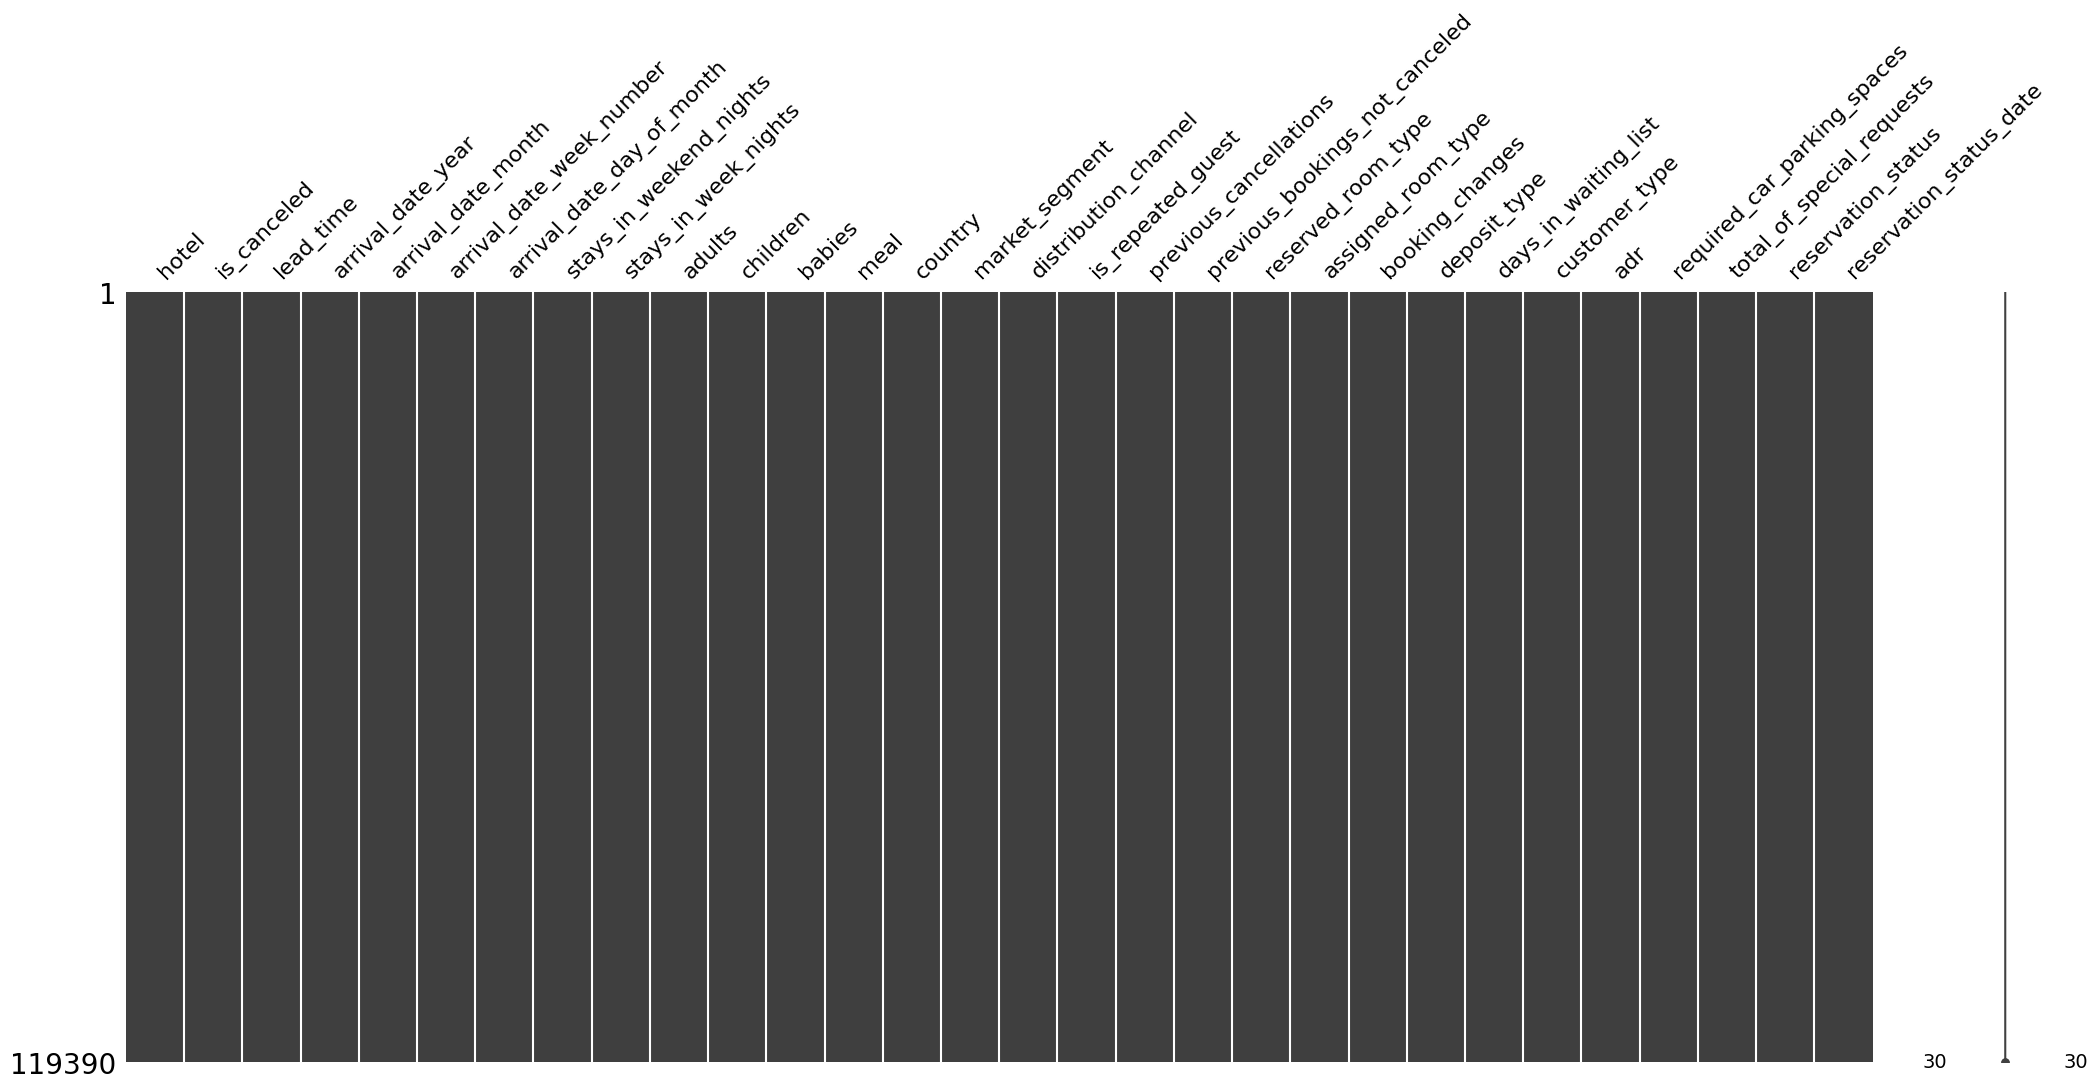

In [149]:
# Matriz de valores faltantes

msno.matrix(df)


In [150]:
# Otra forma de verlo

df_nulos = df.isnull().sum()

df_nulos

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Notas

las columnas children, country, agent, y company tienen valores nulos. La columna company tiene una cantidad significativa de valores nulos (112,593 de 119,390 registros), lo que representa aproximadamente el 94% de los datos. La columna agent tiene 16,340 valores nulos, y country tiene 488 valores nulos.

## Inputación 

In [147]:
df['children'].fillna(df['children'].median(), inplace=True)
df['country'].fillna('Desconocido', inplace=True)

## Eliminación

In [148]:
df.drop(columns=['agent', 'company'], inplace=True)

# Valores Duplicados

In [151]:
duplicados_todas_columnas = df[df.duplicated(keep=False)]
print(f"Número de registros duplicados en todas las columnas: {duplicados_todas_columnas.shape[0]}")


Número de registros duplicados en todas las columnas: 40208


# Valores atípicos


In [152]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [153]:
# Seleccionar las columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns

# Imprimir los nombres de las columnas numéricas
print(columnas_numericas)

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


In [155]:

#Definir la función para generar boxplots

def plot_boxplots(df, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 2) // 3  # 3 boxplots por fila
    fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(f'Boxplot de {col}')
        axes[i].set_ylabel(col)
        axes[i].grid(axis='y')

    # Ocultar los subplots vacíos
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()



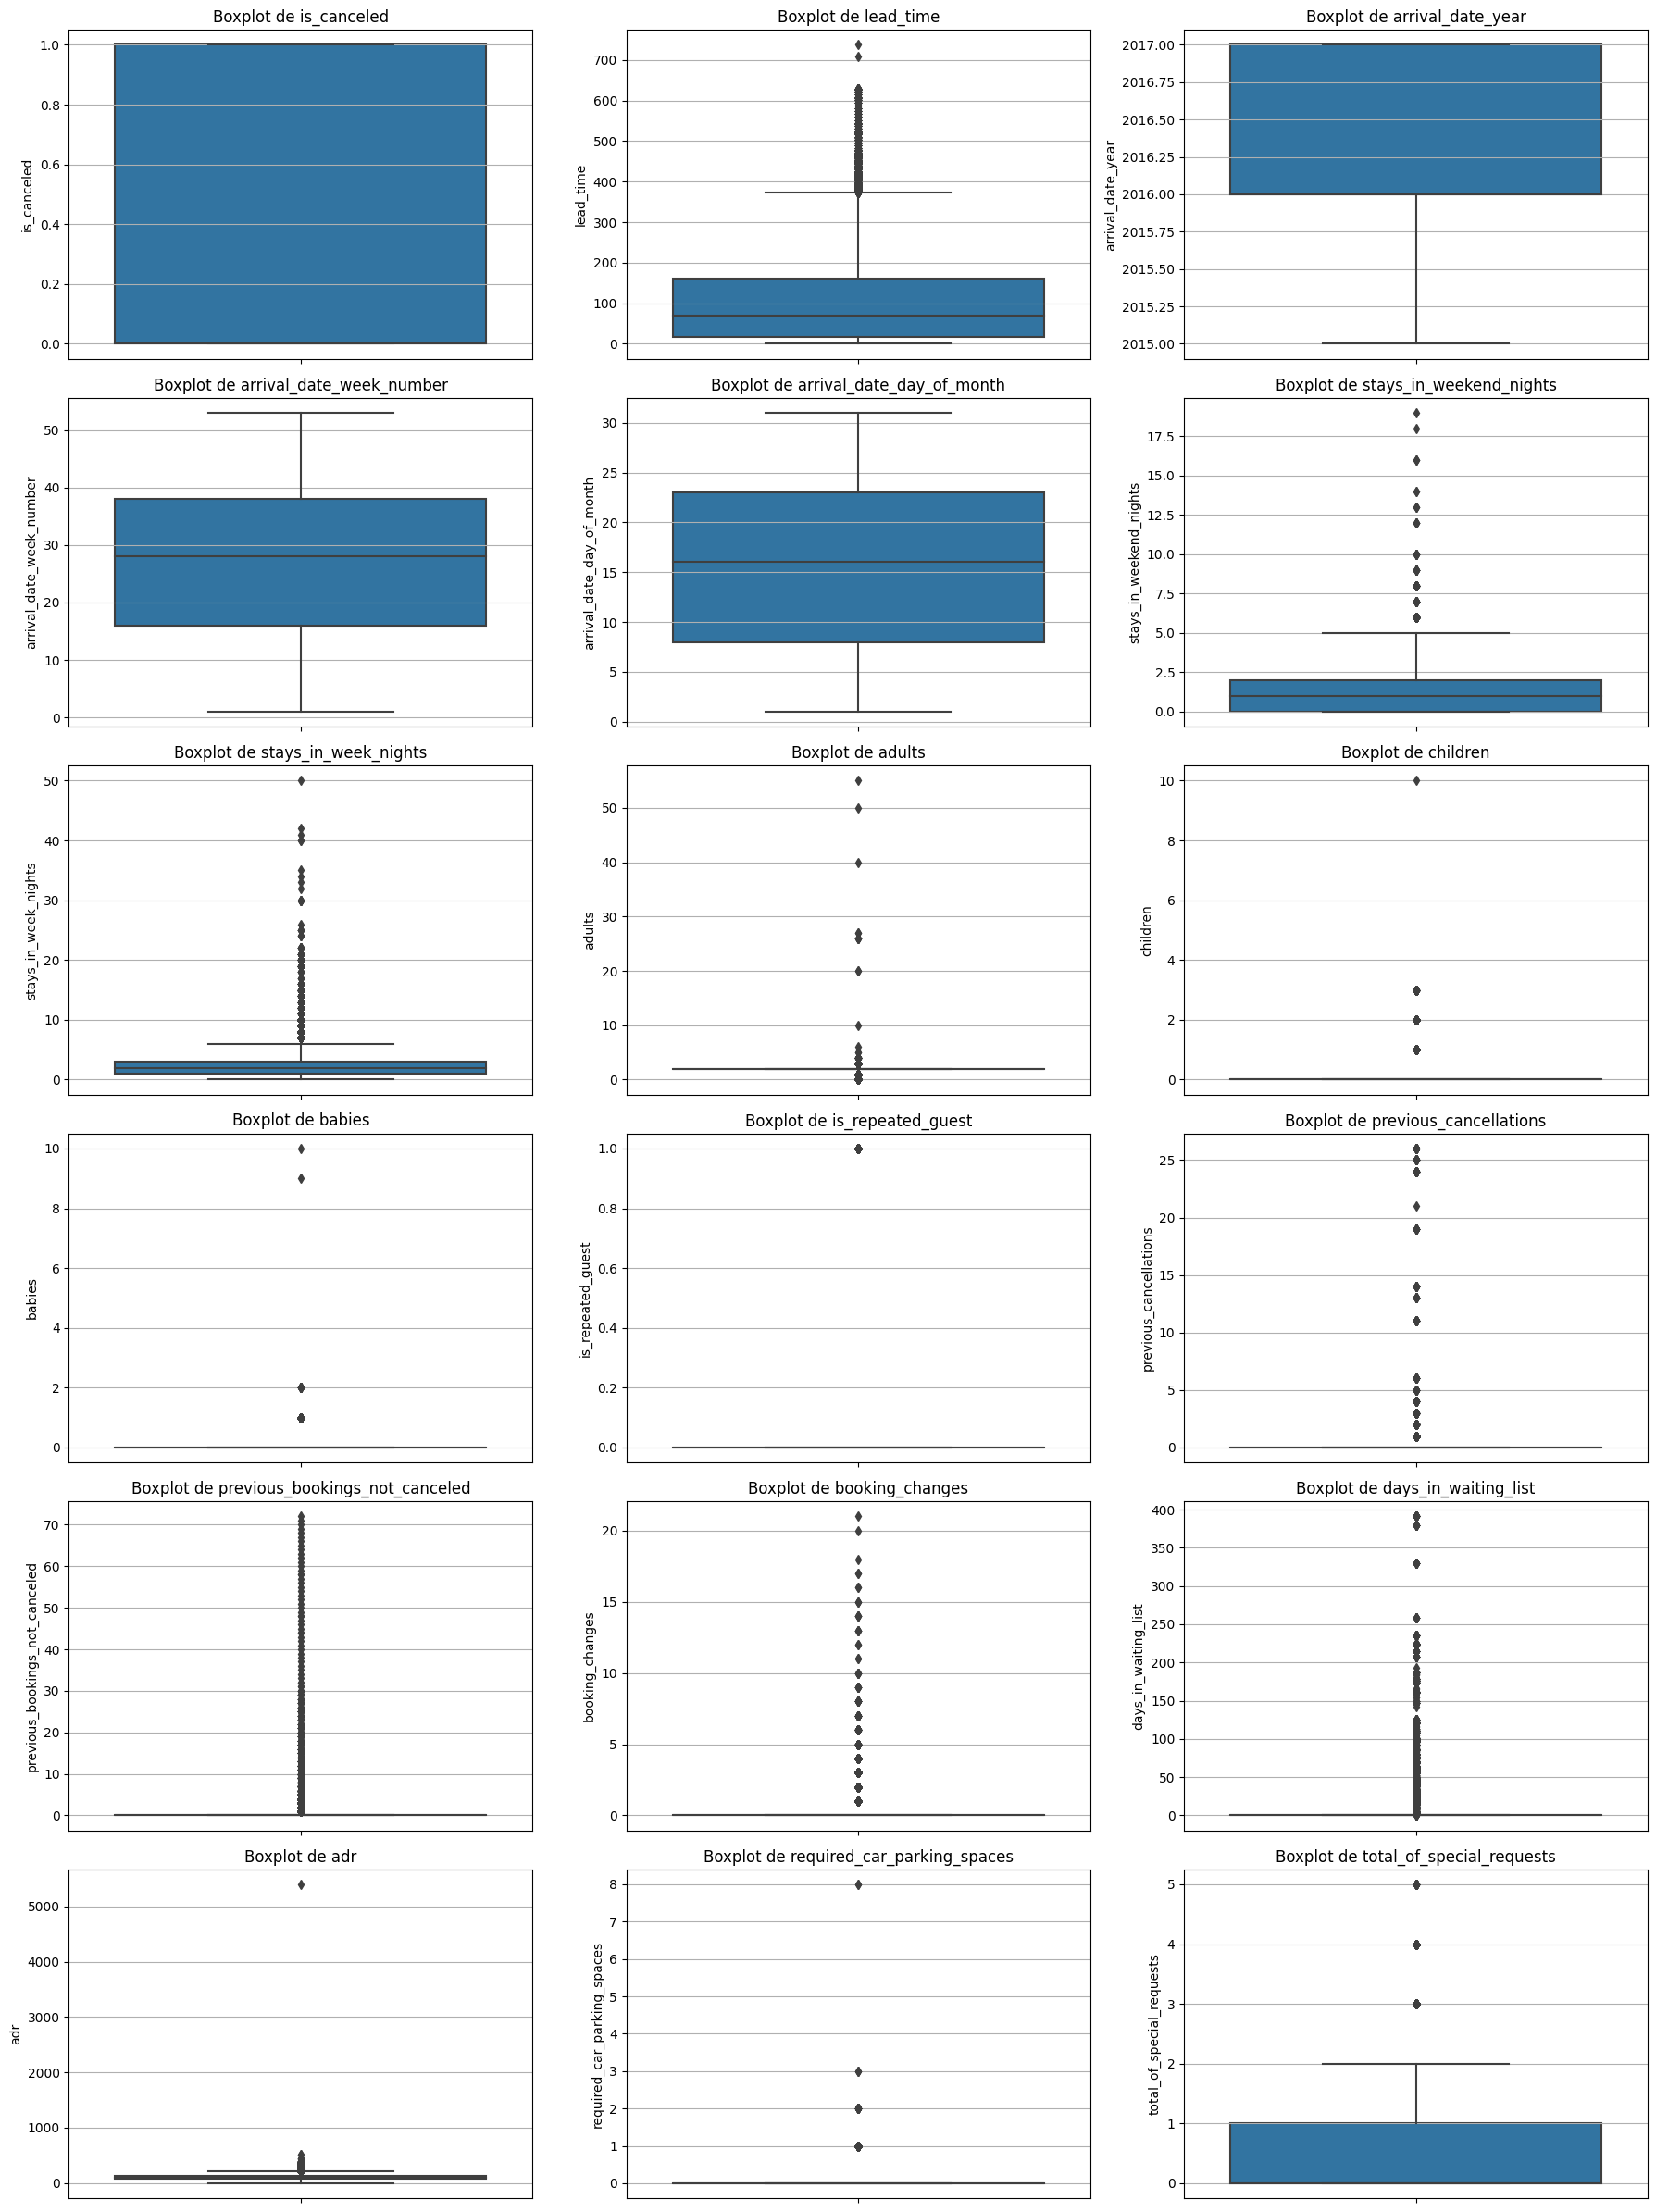

In [156]:
#  Llamar a la función con las columnas de interés

columns_to_analyze = [
    'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number',
    'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
    'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
    'adr', 'required_car_parking_spaces', 'total_of_special_requests'
]

plot_boxplots(df, columns_to_analyze)


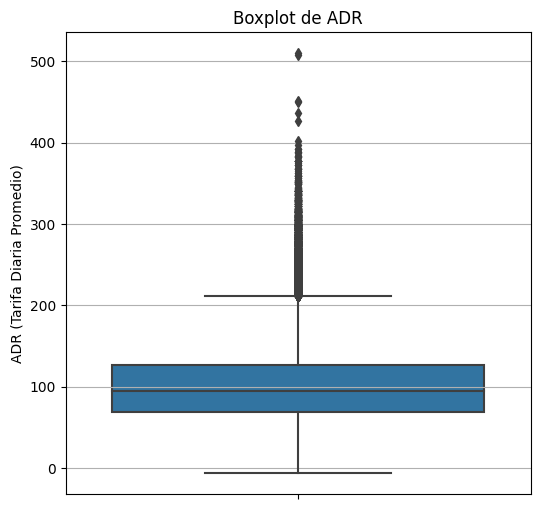

In [161]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['adr'])
plt.title('Boxplot de ADR')
plt.ylabel('ADR (Tarifa Diaria Promedio)')
plt.grid(axis='y')
plt.show()

In [158]:

valores_atipicos = df.loc[df['adr'] > 5000, ['hotel', 'adr']]

print(valores_atipicos)

            hotel     adr
48515  City Hotel  5400.0


### Nota
Para las preguntas :

¿Cuánto pagan los huéspedes por una habitación por noche en promedio?

- Impacto: Alto. Los valores atípicos en adr pueden inflar significativamente el promedio, dando una impresión incorrecta del precio promedio por noche

¿Cómo varía el precio por noche durante el año?

- Impacto: Alto. Los valores atípicos pueden distorsionar la variación mensual del precio por noche, dando resultados que no reflejan la realidad.

##### Conclusión 

Eliminar los valor atípico




In [160]:
df = df[df['adr'] <= 5000]

# Exportando datos limpios



In [121]:
# Especifica la ruta y el nombre del archivo CSV que deseas crear
ruta_archivo_csv = './db/hotel_bookings_limpio.csv'

# Convertir el DataFrame a un archivo CSV
df.to_csv(ruta_archivo_csv, index=False, encoding='ISO-8859-1')

# Preguntas de negocio


##### 1) ¿De dónde vienen los huéspedes?

In [ ]:
# Calcular el conteo de huéspedes por país
conteo_paises = df['country'].value_counts()

# Seleccionar el top 10 de países
top_10_paises = conteo_paises.head(10)

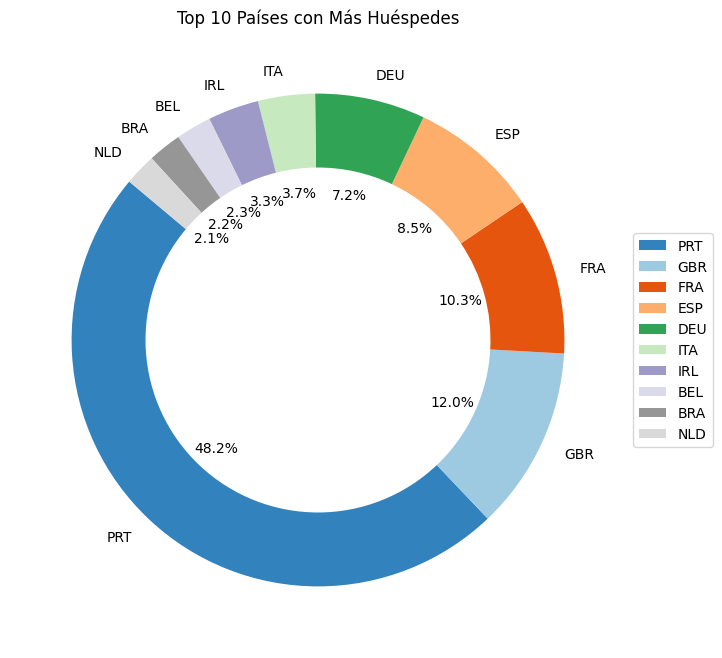

In [169]:
# Crear el gráfico de pastel
plt.figure(figsize=(10, 8))
top_10_paises.plot.pie(autopct='%1.1f%%', startangle=140, cmap='tab20c', wedgeprops=dict(width=0.3))

# Título
plt.title('Top 10 Países con Más Huéspedes')
plt.ylabel('')
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()


##### 2) ¿Cuánto pagan los huéspedes por una habitación por noche en promedio?

In [173]:
print(df['adr'].median())  # Usar mediana para mayor robustez

94.56


In [174]:
print(df['adr'].mean()) 

101.78674417241118


##### 3) ¿Cómo varía el precio por noche durante el año?

In [175]:
print(df.groupby('arrival_date_month')['adr'].median())  # Usar mediana para mayor robustez

arrival_date_month
April         96.30
August       130.50
December      75.00
February      75.00
January       71.00
July         118.10
June         115.00
March         79.20
May          108.00
November      73.00
October       85.67
September    100.30
Name: adr, dtype: float64


In [177]:
# Crear la columna total_nights
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [ ]:
# Calcular el promedio de adr por cada número de noches
promedio_adr_por_noches = df.groupby('total_nights')['adr'].mean().reset_index()



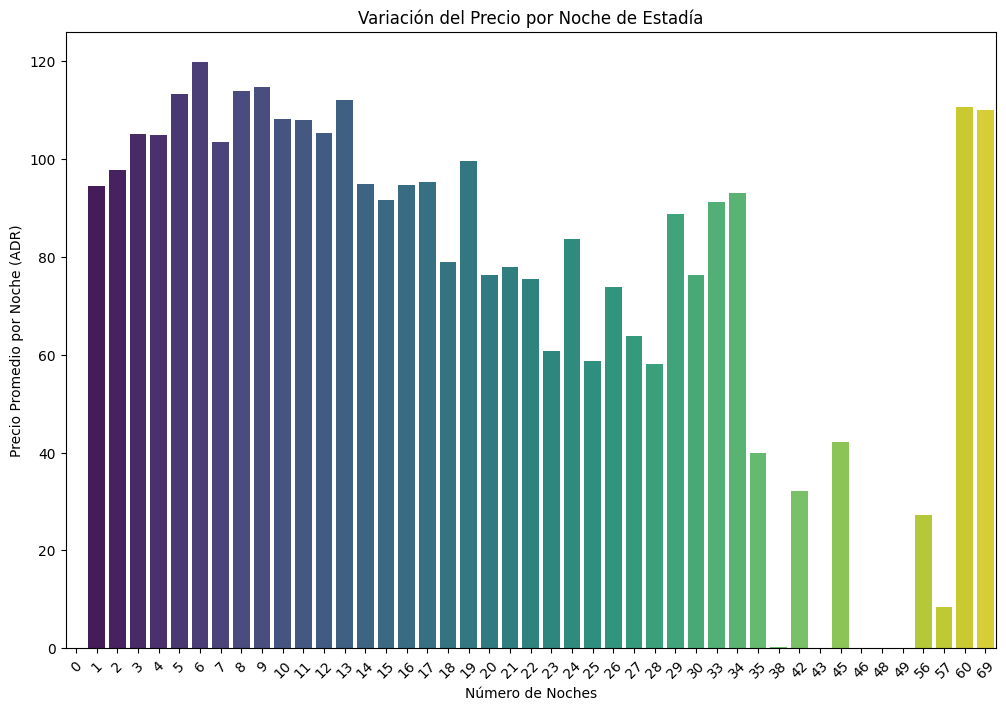

In [184]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='total_nights', y='adr', data=promedio_adr_por_noches, palette='viridis')

# Añadir título y etiquetas
plt.title('Variación del Precio por Noche de Estadía')
plt.xlabel('Número de Noches')
plt.ylabel('Precio Promedio por Noche (ADR)')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()



##### 4) ¿Cuáles son los meses más ocupados?

In [138]:

print(df['arrival_date_month'].value_counts())

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64


In [185]:
# Calcular el conteo de reservas por mes
conteo_meses = df['arrival_date_month'].value_counts().sort_index()

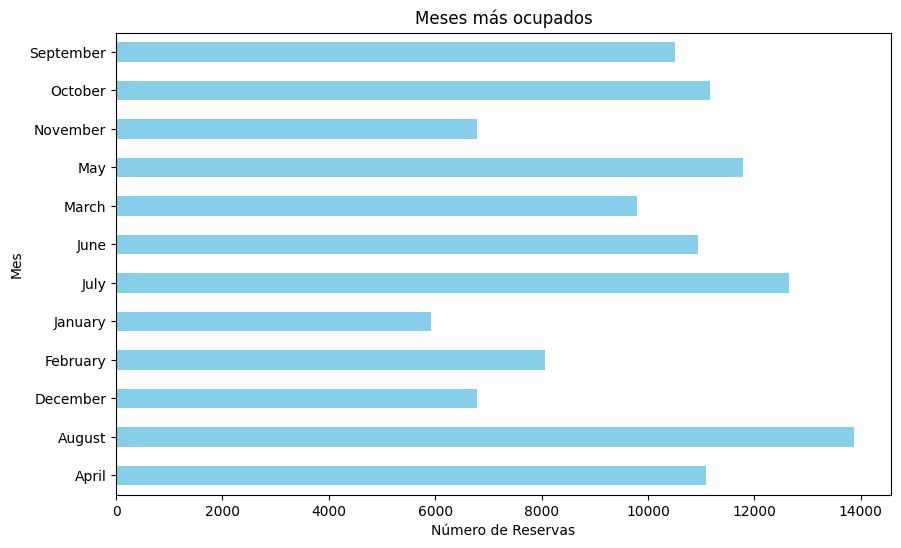

In [186]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
conteo_meses.plot(kind='barh', color='skyblue')

# Añadir título y etiquetas
plt.title('Meses más ocupados')
plt.xlabel('Número de Reservas')
plt.ylabel('Mes')

# Mostrar el gráfico
plt.show()


##### 5) ¿Cuánto tiempo se queda la gente en los hoteles (número de noches)?

In [139]:
# ¿Cuánto tiempo se queda la gente en los hoteles (número de noches)?
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
print(df['total_nights'].describe())

count    119390.000000
mean          3.427900
std           2.557439
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: total_nights, dtype: float64


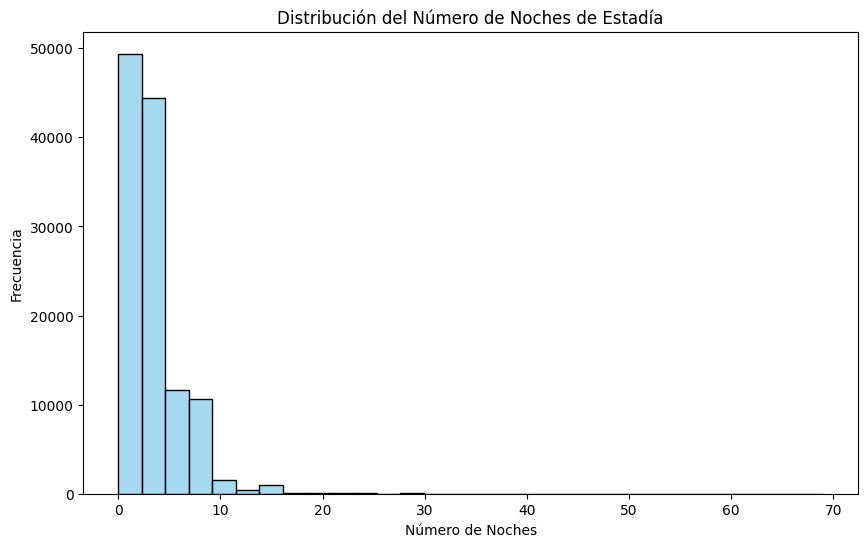

In [187]:
# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['total_nights'], bins=30, kde=False, color='skyblue')

# Añadir título y etiquetas
plt.title('Distribución del Número de Noches de Estadía')
plt.xlabel('Número de Noches')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


##### 6) Reservas por segmento de mercado

In [188]:
# Calcular el conteo de reservas por segmento de mercado
conteo_segmentos = df['market_segment'].value_counts()

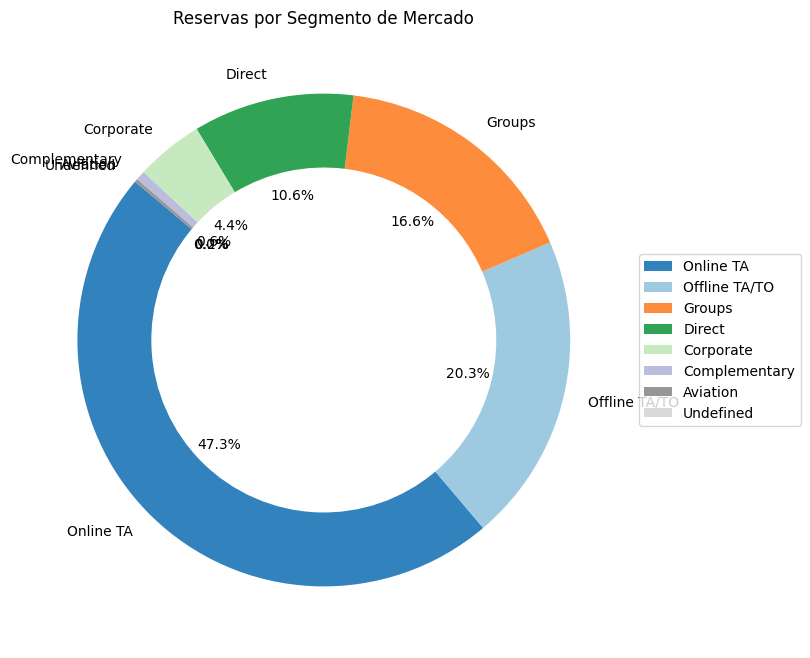

In [189]:
# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
conteo_segmentos.plot.pie(autopct='%1.1f%%', startangle=140, cmap='tab20c', wedgeprops=dict(width=0.3))

# Añadir título y etiquetas
plt.title('Reservas por Segmento de Mercado')
plt.ylabel('')
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()


##### 7) ¿Cuántas reservas se cancelaron?

In [141]:
print(df['is_canceled'].sum())

44224


##### 8) ¿Qué mes tiene el mayor número de cancelaciones?

In [162]:
print(df[df['is_canceled'] == 1]['arrival_date_month'].value_counts())

August       5239
July         4742
May          4677
June         4535
April        4524
October      4246
September    4116
March        3148
February     2696
December     2371
November     2122
January      1807
Name: arrival_date_month, dtype: int64


In [190]:
# Filtrar las cancelaciones
cancelaciones = df[df['is_canceled'] == 1]

# Calcular el conteo de cancelaciones por mes
cancelaciones_por_mes = cancelaciones['arrival_date_month'].value_counts().sort_index()

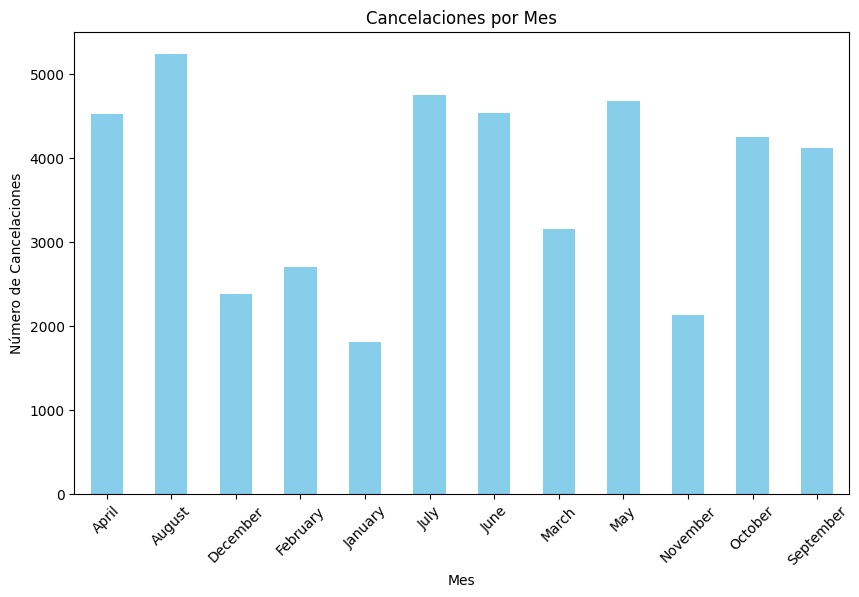

In [191]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
cancelaciones_por_mes.plot(kind='bar', color='skyblue')

# Añadir título y etiquetas
plt.title('Cancelaciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Cancelaciones')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()